In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from models.wimp import SIWIMP
from models.migdal import MIGDAL
from models.wimp import SIWIMP_Helm
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [13]:
## Step 1
Det = DAMA()
# Model = MIGDAL() #SIWIMP()
Model = SIWIMP()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards

In [14]:
## Step 2
mX = 62*GeV # eV
sig = 1.1E-41 # cm2 note this is here sigma_p (see thesis notes for explanation)

def DMRate(T,E):
    ## DM rate defined with SHM
    return Model.dRdER(T,mX,E,sig,Dist)

def DMRate2(T,E):
    ## DM rate defined with SHM+Shards
    return Model.dRdER(T,mX,E,sig,Dist2) 

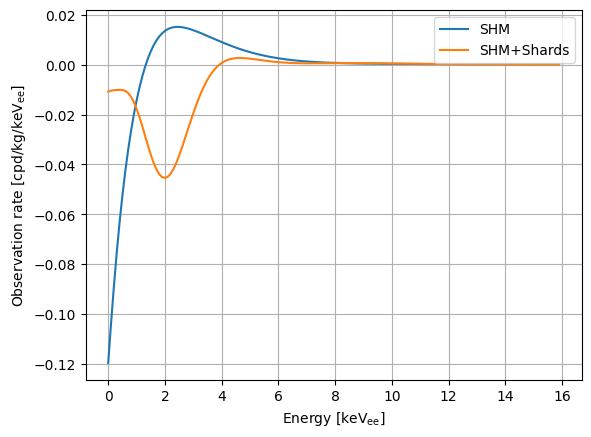

In [16]:
## Step 3
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(DMRate,e) for e in E])
plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend(["SHM","SHM+Shards"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
# plt.xlim(0,16)
# plt.ylim(0,0.026)
# plt.yscale("log"); plt.xscale("log")
plt.grid()
plt.show()

In [22]:
 a[1]

[[1.0767179087524104e-11,
  4.042913213396593e-13,
  2.4036170877434417e-13,
  1.1946017952741634e-14],
 [0.0, 1.2161443855936328e-10, 4.957979299972056e-10, 4.502167364273961e-12],
 [0.0, 1.783568684540122e-10, 8.823072316373048e-10, 7.292970582173856e-12],
 [0.0, 2.9860948032362095e-10, 2.0105120829488655e-09, 1.479772532562769e-11]]